# Salary Prediction Classification | XAI Project

Maxim Lichko<br>
Alexey Demchuk

## 1. Introduction

The task of predicting whether an individual earns more than $50,000 per annum constitutes a significant and socially relevant application of machine learning. The dataset in question encompasses a diverse array of demographic, occupational, and socio-economic variables, making it well-suited for the application of advanced analytical techniques.

Nevertheless, the sensitive nature of this domain—where predictive outcomes intersect with attributes such as race, gender, and education—necessitates not only predictive accuracy but also a high degree of model transparency and interpretability. Consequently, this work places strong emphasis on the use of explainable artificial intelligence (XAI) methods.

Prediction task is to determine whether a person makes over 50K a year.<br>
Kaggle dataset: [link](https://www.kaggle.com/datasets/ayessa/salary-prediction-classification#)

__Columns:__

* __age:__ continuous.
* __workclass:__ Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* __fnlwgt:__ continuous.
* __education:__ Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* __education-num:__ continuous.
* __marital-status:__ Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* __occupation:__ Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* __relationship:__ Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* __race:__ White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* __sex:__ Female, Male.
* __capital-gain:__ continuous.
* __capital-loss:__ continuous.
* __hours-per-week:__ continuous.
* __native-country:__ United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* __salary:__ <=50K or >50K

## 2. EDA

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [25]:
df = pd.read_csv('data/salary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [26]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique values per column:
age: 73
workclass: 9
fnlwgt: 21648
education: 16
education-num: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
capital-gain: 119
capital-loss: 92
hours-per-week: 94
native-country: 42
salary: 2


In [28]:
df['salary'].value_counts(normalize=True)

salary
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [29]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


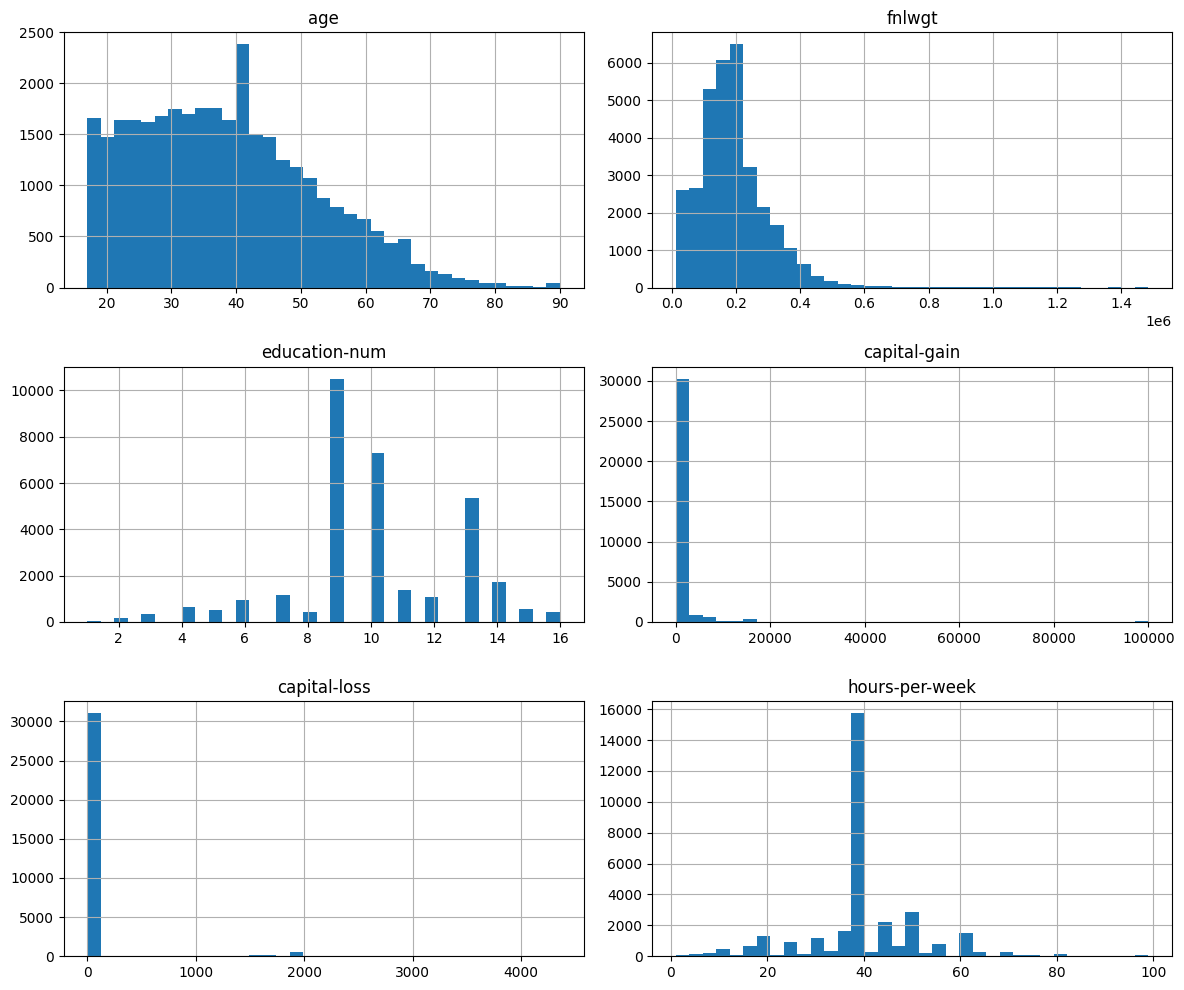

In [30]:
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_features].hist(figsize=(12, 10), bins=35)
plt.tight_layout()
plt.show()

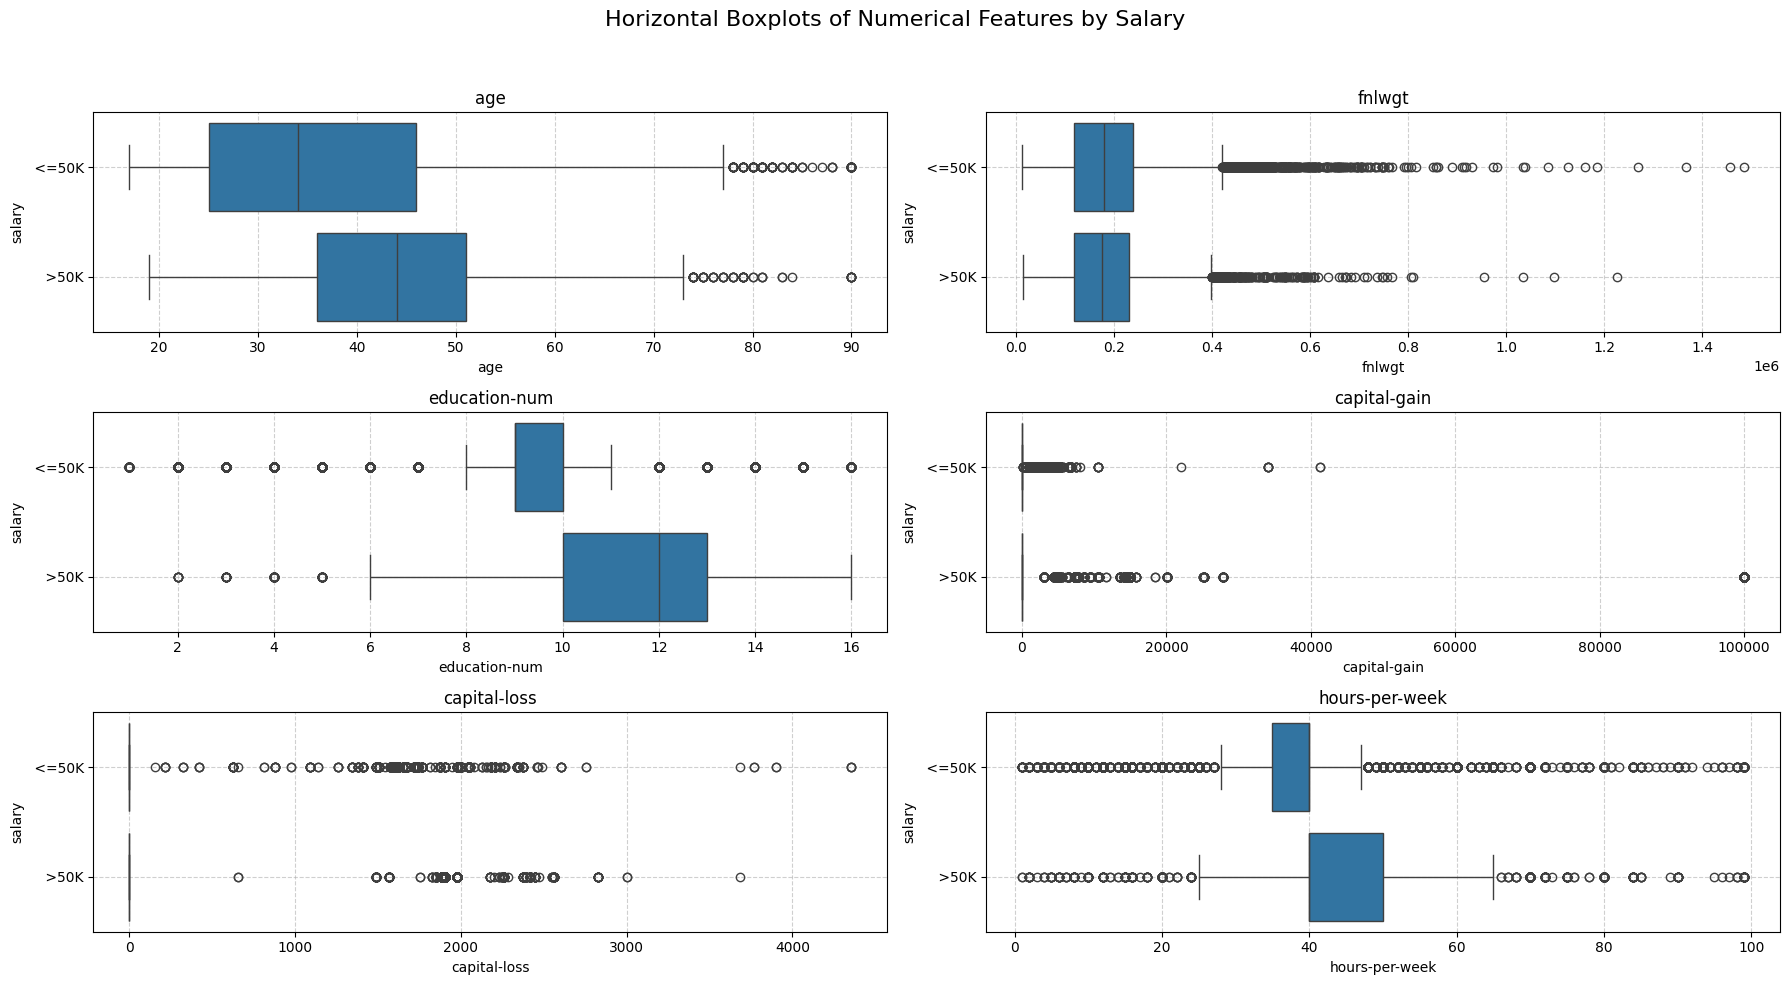

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.suptitle('Horizontal Boxplots of Numerical Features by Salary', fontsize=16)

for ax, feature in zip(axes.flatten(), numerical_features):
    sns.boxplot(data=df, x=feature, y='salary', ax=ax, orient='h')
    ax.set_title(f'{feature}')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

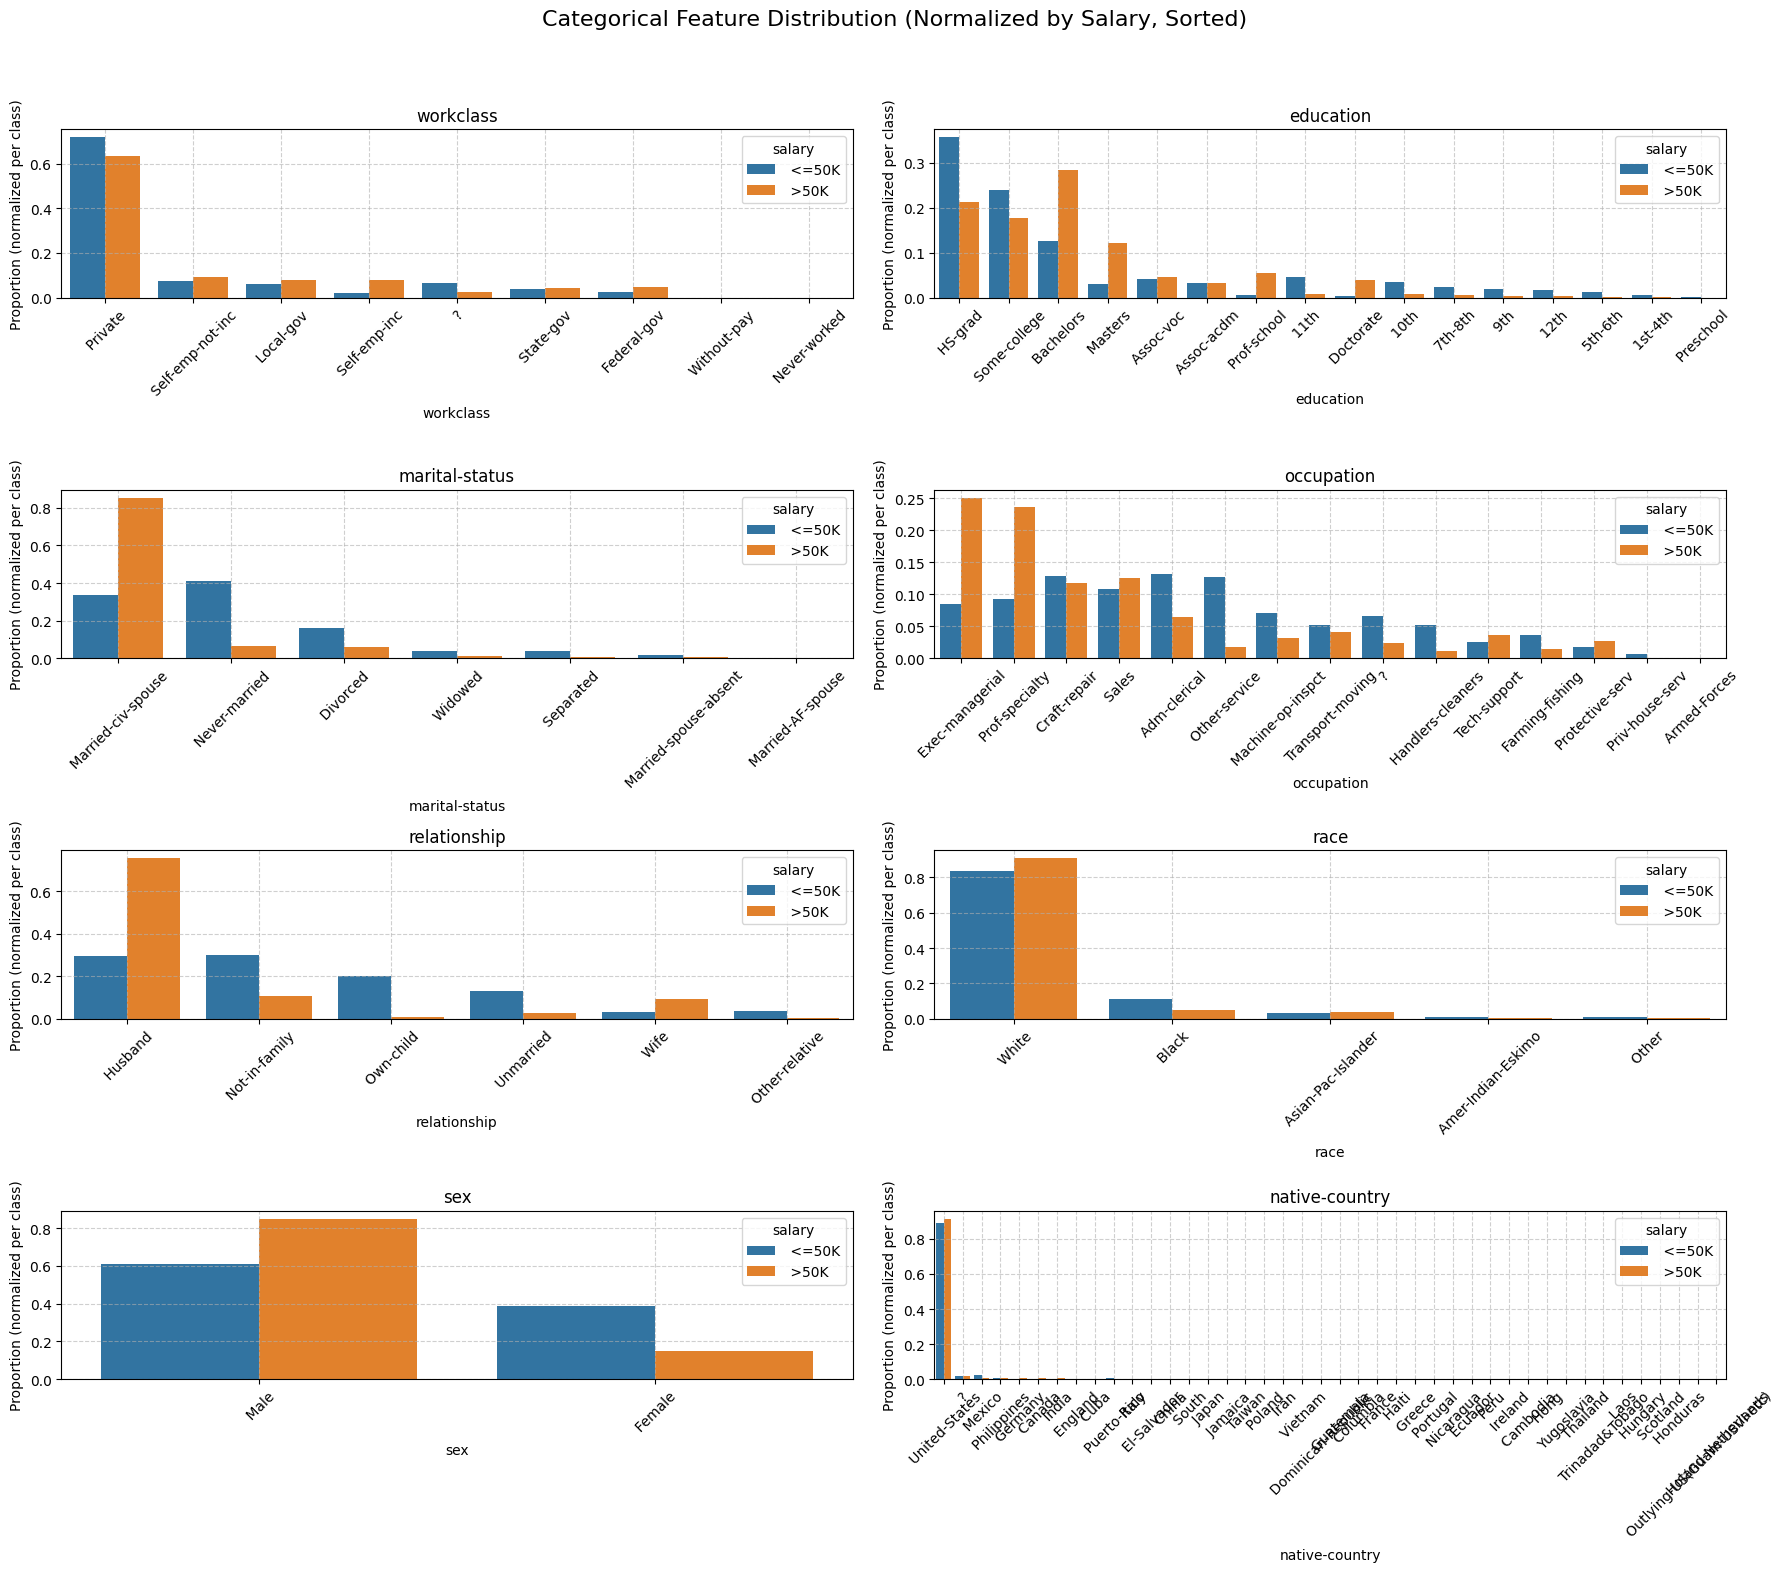

In [32]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country']

n = len(categorical_features)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, rows * 4))
fig.suptitle('Categorical Feature Distribution (Normalized by Salary, Sorted)', fontsize=16)

for ax, feature in zip(axes.flatten(), categorical_features):
    prop_df = (
        df.groupby(['salary', feature])
        .size()
        .groupby(level=0)
        .transform(lambda x: x / x.sum())
        .rename('proportion')
        .reset_index()
    )
    
    pivot_df = prop_df.pivot(index=feature, columns='salary', values='proportion').fillna(0)
    
    if '>50K' in pivot_df.columns:
        sorted_categories = pivot_df['>50K'].sort_values(ascending=False).index
    else:
        sorted_categories = pivot_df.sum(axis=1).sort_values(ascending=False).index

    sns.barplot(data=prop_df, x=feature, y='proportion', hue='salary',
                order=sorted_categories, ax=ax)

    ax.set_title(f'{feature}')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_ylabel('Proportion (normalized per class)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

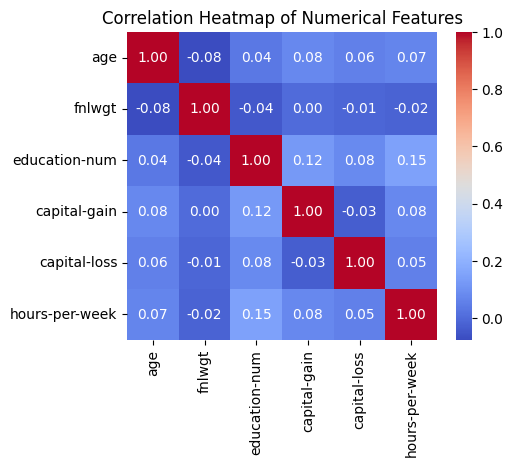

In [33]:
plt.figure(figsize=(5, 4))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## 3. Feature Engineering

In [34]:
df_fe = df.copy()
print("Missing values:\n", df_fe.isnull().sum())
df_fe.head()

Missing values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
del df_fe['education-num']

df_fe = df_fe.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df_fe['sex'] = df_fe['sex'].map({'Male': 1, 'Female': 0})
df_fe['salary'] = df_fe['salary'].map({'>50K': 1, '<=50K': 0})
df_fe['capital_diff'] = df_fe['capital-gain'] - df_fe['capital-loss']

In [36]:
df_fe['native-country'] = df_fe['native-country'].str.strip()

def map_country_to_region(country):
    latin_america = {
        'Mexico', 'Puerto-Rico', 'Honduras', 'Cuba', 'Jamaica', 'Columbia',
        'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Haiti', 'Nicaragua',
        'Peru', 'Ecuador', 'Trinadad&Tobago'
    }
    asia = {
        'India', 'China', 'Japan', 'Philippines', 'Iran', 'Cambodia', 'Thailand',
        'Laos', 'Vietnam', 'Taiwan', 'Hong'
    }
    europe = {
        'England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 'Ireland',
        'Greece', 'Scotland', 'Yugoslavia', 'Hungary', 'Holand-Netherlands'
    }
    north_america = {
        'United-States', 'Canada'
    }

    if country in latin_america:
        return 'Latin_America'
    elif country in asia:
        return 'Asia'
    elif country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North_America'
    else:
        return 'Other'

df_fe['native_region'] = df_fe['native-country'].apply(map_country_to_region)
print(df_fe[['native_region', 'native-country']].drop_duplicates().sort_values('native_region'))

del df_fe['native-country']

       native_region              native-country
304             Asia                        Laos
311             Asia                      Taiwan
152             Asia                 Philippines
135             Asia                        Iran
873             Asia                       China
265             Asia                    Thailand
1020            Asia                       Japan
2259            Asia                     Vietnam
11              Asia                       India
2655            Asia                        Hong
255             Asia                    Cambodia
1025          Europe                  Yugoslavia
1888          Europe                      Greece
503           Europe                      France
359           Europe                    Portugal
2966          Europe                     Ireland
8562          Europe                     Hungary
1586          Europe                    Scotland
19609         Europe          Holand-Netherlands
217           Europe

In [37]:
df_fe['education'] = df_fe['education'].str.strip()

def map_education_level(edu):
    if edu == 'Preschool':
        return 'Preschool'
    elif edu in ['1st-4th', '5th-6th']:
        return 'Primary_school'
    elif edu in ['7th-8th']:
        return 'Middle_school'
    elif edu in ['9th', '10th', '11th', '12th']:
        return 'Some_high_school'
    elif edu == 'HS-grad':
        return 'High_school_graduate'
    elif edu in ['Some-college', 'Assoc-acdm', 'Assoc-voc']:
        return 'Some_college_or_associate'
    elif edu == 'Bachelors':
        return "Bachelor_degree"
    elif edu in ['Masters', 'Doctorate', 'Prof-school']:
        return 'Advanced_degree'
    else:
        return 'Other'

df_fe['education_group'] = df_fe['education'].apply(map_education_level)
print(df_fe[['education', 'education_group']].drop_duplicates().sort_values('education'))

del df_fe['education']

        education            education_group
77           10th           Some_high_school
3            11th           Some_high_school
415          12th           Some_high_school
160       1st-4th             Primary_school
56        5th-6th             Primary_school
15        7th-8th              Middle_school
6             9th           Some_high_school
13     Assoc-acdm  Some_college_or_associate
14      Assoc-voc  Some_college_or_associate
0       Bachelors            Bachelor_degree
20      Doctorate            Advanced_degree
2         HS-grad       High_school_graduate
5         Masters            Advanced_degree
224     Preschool                  Preschool
52    Prof-school            Advanced_degree
10   Some-college  Some_college_or_associate


In [38]:
df_fe['relationship'] = df_fe['relationship'].str.strip()

unify_map = {
    'Husband': 'Spouse',
    'Wife': 'Spouse',
    'Unmarried': 'Non-family',
    'Not-in-family': 'Non-family'
}

df_fe['relationship'] = df_fe['relationship'].replace(unify_map)
print(df_fe[['marital-status', 'relationship']].drop_duplicates().sort_values('marital-status'))

              marital-status    relationship
2                   Divorced      Non-family
233                 Divorced  Other-relative
32                  Divorced       Own-child
13034      Married-AF-spouse  Other-relative
11481      Married-AF-spouse       Own-child
37         Married-AF-spouse          Spouse
1172      Married-civ-spouse      Non-family
74        Married-civ-spouse  Other-relative
1         Married-civ-spouse          Spouse
33        Married-civ-spouse       Own-child
6      Married-spouse-absent      Non-family
485    Married-spouse-absent       Own-child
766    Married-spouse-absent  Other-relative
12             Never-married       Own-child
110            Never-married  Other-relative
0              Never-married      Non-family
21                 Separated      Non-family
71                 Separated       Own-child
159                Separated  Other-relative
147                  Widowed      Non-family
1223                 Widowed       Own-child
1710      

In [39]:
one_hot_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native_region', 'education_group']
df_fe = pd.get_dummies(df_fe, columns=one_hot_cols, drop_first=True).astype(int)

df_fe['age_bin'] = pd.cut(df_fe['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elder'])
df_fe['work_hours_bin'] = pd.cut(df_fe['hours-per-week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

df_fe = pd.get_dummies(df_fe, columns=['age_bin', 'work_hours_bin'], drop_first=True).astype(int)

In [40]:
df_fe.head()

,age,fnlwgt,sex,capital-gain,capital-loss,hours-per-week,salary,capital_diff,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Other-relative,relationship_Own-child,relationship_Spouse,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_region_Europe,native_region_Latin_America,native_region_North_America,native_region_Other,education_group_Bachelor_degree,education_group_High_school_graduate,education_group_Middle_school,education_group_Preschool,education_group_Primary_school,education_group_Some_college_or_associate,education_group_Some_high_school,age_bin_Middle-aged,age_bin_Senior,age_bin_Elder,work_hours_bin_Full-time,work_hours_bin_Overtime,work_hours_bin_Extreme
0,39,77516,1,2174,0,40,0,2174,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,50,83311,1,0,0,13,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,38,215646,1,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,53,234721,1,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,28,338409,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [41]:
df_fe.shape

(32561, 60)

## 4. Models
Assuming using future models for banks to predict individuals earning above $50K, we aim to maximize **recall** to ensure high earners are not missed for credit opportunities.


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

# Splitting data
TargetName = "salary"
df_train = df_fe.sample(frac=0.8, random_state=42)
df_test = df_fe.drop(df_train.index)
X_train = df_train.drop(columns=TargetName)  # Directly drop the target column
X_test = df_test.drop(columns=TargetName)    # Directly drop the target column
Y_train = df_train[TargetName]
Y_test = df_test[TargetName]

# Calculating class weight
# Due to the dataset's imbalance (76% <=50K, 24% >50K), we applied class weighting to 
# prioritize the minority class and improve recall.
neg_count = len(Y_train[Y_train == 0])
pos_count = len(Y_train[Y_train == 1])
scale_pos_weight = neg_count / pos_count  # Approx 19776 / 6273 ≈ 3.15

#### 4.1. XGBoost

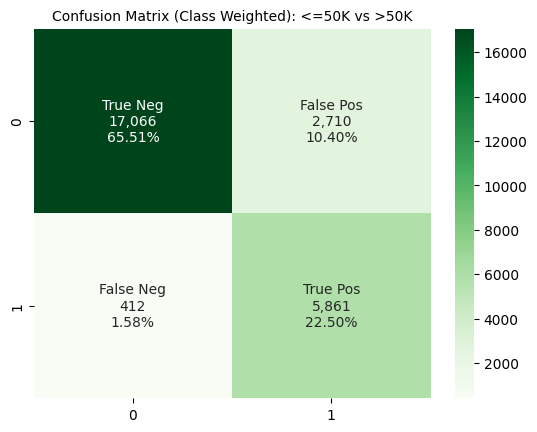

Model accuracy for train dataset: 0.880
Model accuracy for test dataset: 0.843
Cross-validation ROC AUC mean: 0.924
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=100; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=100; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=100; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, reg_la

In [43]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", seed=42, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, Y_train)

# Confusion Matrix
y_pred = xgb_model.predict(X_train)
cm = confusion_matrix(Y_train, y_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{:,}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')
plt.title('Confusion Matrix (Class Weighted): <=50K vs >50K', fontsize=10)
plt.show()

# Accuracy
def print_accuracy(model, X, Y, which_set):
    y_pred = model.predict(X)
    acc = accuracy_score(Y, y_pred)
    print(f'Model accuracy for {which_set} dataset: {acc:.3f}')
print_accuracy(xgb_model, X_train, Y_train, "train")
print_accuracy(xgb_model, X_test, Y_test, "test")

# 2. K-fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(xgb_model, X_train, Y_train, cv=kfold, scoring='roc_auc')
print(f"Cross-validation ROC AUC mean: {cv_results.mean():.3f}")

# 3. GridSearchCV for Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.25, 1],
    'reg_lambda': [0, 10, 100]
}
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective="binary:logistic", subsample=0.9, colsample_bytree=0.5, seed=42, scale_pos_weight=scale_pos_weight),
    param_grid=param_grid,
    scoring='accuracy',
    verbose=2,
    n_jobs=1,
    cv=3
)
grid_search.fit(X_train, Y_train, verbose=0)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# 4. Train with Best Parameters
best_model = xgb.XGBClassifier(
    objective="binary:logistic",
    subsample=0.9,
    colsample_bytree=0.5,
    seed=42,
    scale_pos_weight=scale_pos_weight,
    **grid_search.best_params_
)
best_model.fit(X_train, Y_train)

# Final Evaluation
y_pred_test = best_model.predict(X_test)
print("Test Precision:", precision_score(Y_test, y_pred_test))
print("Test Recall:", recall_score(Y_test, y_pred_test))
print("Test ROC AUC:", roc_auc_score(Y_test, best_model.predict_proba(X_test)[:, 1]))

In [44]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=True)

print("\nFeature Importance (ascending):\n")
print("   № | Feature Name                   | Importance")
print("-" * 50)
for i, row in enumerate(feature_importance.itertuples(), 1):
    print(f"{i:4d} | {row.feature:<30} | {row.importance:.6f}")


Feature Importance (ascending):

   № | Feature Name                   | Importance
--------------------------------------------------
   1 | workclass_Never-worked         | 0.000000
   2 | occupation_Armed-Forces        | 0.000000
   3 | work_hours_bin_Full-time       | 0.002133
   4 | workclass_Private              | 0.002926
   5 | age_bin_Middle-aged            | 0.003489
   6 | workclass_Without-pay          | 0.003518
   7 | race_White                     | 0.003550
   8 | work_hours_bin_Extreme         | 0.004067
   9 | native_region_North_America    | 0.004247
  10 | fnlwgt                         | 0.004563
  11 | native_region_Other            | 0.004579
  12 | native_region_Europe           | 0.004743
  13 | age_bin_Elder                  | 0.004748
  14 | occupation_Transport-moving    | 0.004945
  15 | occupation_Priv-house-serv     | 0.005108
  16 | age_bin_Senior                 | 0.005123
  17 | race_Asian-Pac-Islander        | 0.005471
  18 | occupation_Craft-repair 

Dropping features with Importance < 0.005. Total features to drop: 14





Dropping 14 features: ['occupation_Transport-moving', 'age_bin_Elder', 'native_region_Europe', 'native_region_Other', 'fnlwgt', 'native_region_North_America', 'work_hours_bin_Extreme', 'race_White', 'workclass_Without-pay', 'age_bin_Middle-aged', 'workclass_Private', 'work_hours_bin_Full-time', 'occupation_Armed-Forces', 'workclass_Never-worked']


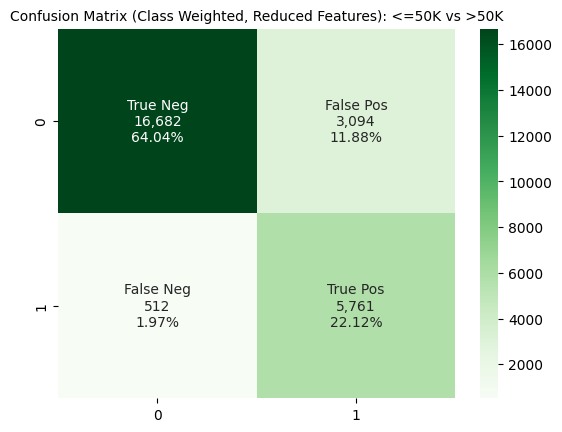

Model accuracy for train dataset: 0.862
Model accuracy for test dataset: 0.839
Cross-validation ROC AUC mean: 0.925
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=100; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=100; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=100; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=5, reg_la

In [45]:
features_to_drop = [
    'occupation_Transport-moving', 'age_bin_Elder', 'native_region_Europe',
    'native_region_Other', 'fnlwgt', 'native_region_North_America',
    'work_hours_bin_Extreme', 'race_White', 'workclass_Without-pay',
    'age_bin_Middle-aged', 'workclass_Private', 'work_hours_bin_Full-time',
    'occupation_Armed-Forces', 'workclass_Never-worked'
]

print(f"Dropping {len(features_to_drop)} features: {features_to_drop}")

# Dropping the selected features
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

# Retraining the model with reduced features
xgb_model = xgb.XGBClassifier(objective="binary:logistic", seed=42, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, Y_train)

# Confusion Matrix
y_pred = xgb_model.predict(X_train)
cm = confusion_matrix(Y_train, y_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{:,}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')
plt.title('Confusion Matrix (Class Weighted, Reduced Features): <=50K vs >50K', fontsize=10)
plt.show()

# Accuracy
print_accuracy(xgb_model, X_train, Y_train, "train")
print_accuracy(xgb_model, X_test, Y_test, "test")

# K-fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(xgb_model, X_train, Y_train, cv=kfold, scoring='roc_auc')
print(f"Cross-validation ROC AUC mean: {cv_results.mean():.3f}")

# GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective="binary:logistic", subsample=0.9, colsample_bytree=0.5, seed=42, scale_pos_weight=scale_pos_weight),
    param_grid=param_grid,
    scoring='accuracy',
    verbose=2,
    n_jobs=1,
    cv=3
)
grid_search.fit(X_train, Y_train, verbose=0)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train with Best Parameters
best_model = xgb.XGBClassifier(
    objective="binary:logistic",
    subsample=0.9,
    colsample_bytree=0.5,
    seed=42,
    scale_pos_weight=scale_pos_weight,
    **grid_search.best_params_
)
best_model.fit(X_train, Y_train)

# Final Evaluation
y_pred_test = best_model.predict(X_test)
print("Test Precision:", precision_score(Y_test, y_pred_test))
print("Test Recall:", recall_score(Y_test, y_pred_test))
print("Test ROC AUC:", roc_auc_score(Y_test, best_model.predict_proba(X_test)[:, 1]))

Test recall for the model with dropped features increased from 0.851 to 0.863, aligning with the goal of identifying more >50K earners.
The train-test gap improved from 3.7% to 2.3%, indicating better generalization.
ROC AUC (0.929) and other metrics remained consistent, confirming that dropping fnlwgt and the 14 low-importance features (including some age_bin and work_hours_bin features) was a good decision.



#### 4.2. LightGBM

In [46]:
# Training LightGBM Model with All Variables
lgb_model = lgb.LGBMClassifier(
    objective="binary",
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
lgb_model.fit(X_train, Y_train)

# Calculateing feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb_model.feature_importances_
})

# Normalizing importance scores to sum to 1
total_importance = feature_importance['importance'].sum()
if total_importance > 0:  # avoiding division by zero
    feature_importance['normalized_importance'] = feature_importance['importance'] / total_importance
else:
    feature_importance['normalized_importance'] = feature_importance['importance']

# Sorting in ascending order
feature_importance = feature_importance.sort_values('normalized_importance', ascending=True)

print("\nFeature Importance (All Variables:\n")
print("№ | Feature Name                     | Importance | Normalized Importance")
print("-" * 70)
for i, row in enumerate(feature_importance.itertuples(), 1):
    print(f"{i:4d} | {row.feature:<30} | {row.importance:>10d} | {row.normalized_importance:.6f}")

[LightGBM] [Info] Number of positive: 6273, number of negative: 19776
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 26049, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240815 -> initscore=-1.148214
[LightGBM] [Info] Start training from score -1.148214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LightGBM excluded features with zero importance (e.g., marital-status_married-af-spouse), likely due to low predictive power or redundancy, reducing the list to 45 from 59.
Let's drop low-importance features (< 0.005), retrain the model with reduced features, evaluate with a confusion matrix, accuracy, cross-validation, tune hyperparameters, and assess precision, recall, and ROC AUC on the test set.

Dropping 13 features: ['marital-status_Married-spouse-absent', 'marital-status_Married-AF-spouse', 'marital-status_Separated', 'race_Other', 'occupation_Priv-house-serv', 'relationship_Other-relative', 'occupation_Craft-repair', 'marital-status_Widowed', 'occupation_Handlers-cleaners', 'occupation_Protective-serv', 'education_group_Preschool', 'workclass_State-gov', 'occupation_Other-service']


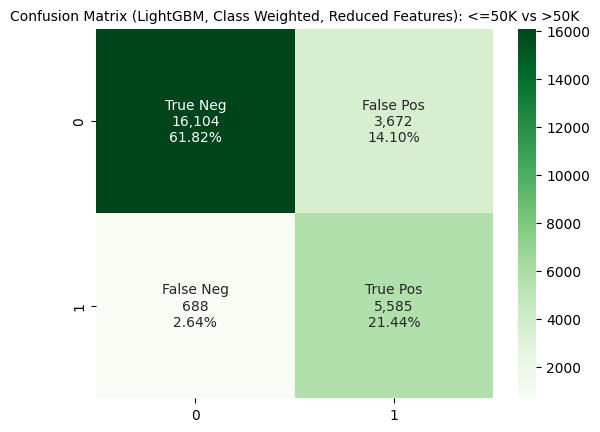

Sum of TP + TN + FP + FN =  5585 + 16104 + 3672 + 688  = 26049
True
Model accuracy for train dataset: 0.833
Model accuracy for test dataset: 0.829
Cross-validation ROC AUC mean: 0.926
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=3, min_gain_to_split=0; total time=   0.1s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=3, min_gain_to_split=0; total time=   0.1s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=3, min_gain_to_split=0; total time=   0.1s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=3, min_gain_to_split=0.25; total time=   0.1s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=3, min_gain_to_split=0.25; total time=   0.1s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=3, min_gain_to_split=0.25; total time=   0.1s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=3, min_gain_to_split=1; total time=   0.1s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=3, min_gain_to_split=1; tota

In [47]:
features_to_drop = [
    # Features with normalized importance < 0.005
    'marital-status_Married-spouse-absent',
    'marital-status_Married-AF-spouse',
    'marital-status_Separated',
    'race_Other',
    'occupation_Priv-house-serv',
    'relationship_Other-relative',
    'occupation_Craft-repair',
    'marital-status_Widowed',
    'occupation_Handlers-cleaners',
    'occupation_Protective-serv',
    'education_group_Preschool',
    'workclass_State-gov',
    'occupation_Other-service',
    # Features excluded by LightGBM
    'occupation_Armed-Forces',
    'workclass_Never-worked',
    'workclass_Without-pay',
    'workclass_Private',
    'race_White',
    'native_region_North_America',
    'native_region_Europe',
    'native_region_Other',
    'work_hours_bin_Extreme',
    'work_hours_bin_Full-time',
    'age_bin_Elder',
    'age_bin_Middle-aged',
    'fnlwgt',
    'occupation_Transport-moving'
]

# Filtering features_to_drop to only include those present in X_train
features_to_drop = [f for f in features_to_drop if f in X_train.columns]

print(f"Dropping {len(features_to_drop)} features: {features_to_drop}")

# Dropping the selected features
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Training LightGBM Model with Reduced Features
lgb_model = lgb.LGBMClassifier(
    objective="binary",
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    min_data_in_leaf=20,  
    min_gain_to_split=0.1,  
    verbosity=-1 
)
lgb_model.fit(X_train_reduced, Y_train)

# Confusion Matrix
y_pred = lgb_model.predict(X_train_reduced)
cm = confusion_matrix(Y_train, y_pred)

TN = cm[0][0]
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{:,.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')
plt.title('Confusion Matrix (LightGBM, Class Weighted, Reduced Features): <=50K vs >50K', fontsize=10)
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.show()

print("Sum of TP + TN + FP + FN = ", str(TP) + " + " + str(TN) + " + " + str(FP) + " + " + str(FN), 
      " = " + str(TP + TN + FP + FN) + "\n" + str(len(Y_train) == TP + TN + FP + FN))

# Accuracy
def print_accuracy(model, X, Y, which_set):
    y_pred = model.predict(X)
    acc = accuracy_score(Y, y_pred)
    print(f'Model accuracy for {which_set} dataset: {acc:.3f}')
print_accuracy(lgb_model, X_train_reduced, Y_train, "train")
print_accuracy(lgb_model, X_test_reduced, Y_test, "test")

# K-fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(lgb_model, X_train_reduced, Y_train, cv=kfold, scoring='roc_auc')
print(f"Cross-validation ROC AUC mean: {cv_results.mean():.3f}")

# GridSearchCV for Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_gain_to_split': [0, 0.25, 1],
    'lambda_l2': [0, 10, 100]
}
grid_search = GridSearchCV(
    estimator=lgb.LGBMClassifier(
        objective="binary",
        num_leaves=31,
        subsample=0.9,
        colsample_bytree=0.5,
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        min_data_in_leaf=20,
        verbosity=-1
    ),
    param_grid=param_grid,
    scoring='accuracy',
    verbose=2,
    n_jobs=1,
    cv=3
)
grid_search.fit(X_train_reduced, Y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the model with best parameters
best_model = lgb.LGBMClassifier(
    objective="binary",
    num_leaves=31,
    subsample=0.9,
    colsample_bytree=0.5,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    min_data_in_leaf=20,
    verbosity=-1,
    **grid_search.best_params_ 
)
best_model.fit(X_train_reduced, Y_train)

# Final Evaluation
y_pred_test = best_model.predict(X_test_reduced)
print("Test Precision:", precision_score(Y_test, y_pred_test))
print("Test Recall:", recall_score(Y_test, y_pred_test))
print("Test ROC AUC:", roc_auc_score(Y_test, best_model.predict_proba(X_test_reduced)[:, 1]))

Test recall is 0.837, precision 0.592, ROC AUC 0.913, train-test accuracy gap 0.3%.
Let's use permutation importance (scoring='recall') to refine feature selection, increase scale_pos_weight to 5, optimize GridSearchCV for recall, tune num_leaves, adjust the decision threshold for higher recall, and re-evaluate train/test metrics.



In [ ]:
# Defining X_train_reduced_perm (Minimal Permutation Importance)
best_model = lgb.LGBMClassifier(objective="binary", num_leaves=31, subsample=0.9, colsample_bytree=0.5, random_state=42, scale_pos_weight=3.15, min_data_in_leaf=20, verbosity=-1, lambda_l2=0, learning_rate=0.01, max_depth=7, min_gain_to_split=0)
best_model.fit(X_train_reduced, Y_train)
perm_importance = permutation_importance(best_model, X_train_reduced, Y_train, scoring='recall', n_repeats=10, random_state=42)
feature_importance_perm = pd.DataFrame({'feature': X_train_reduced.columns, 'importance': perm_importance.importances_mean})
features_to_drop_perm = feature_importance_perm[feature_importance_perm['importance'] < 0.002]['feature'].tolist()
X_train_reduced_perm = X_train_reduced.drop(columns=features_to_drop_perm)
X_test_reduced_perm = X_test_reduced.drop(columns=features_to_drop_perm)

# Training LightGBM with Increased scale_pos_weight
scale_pos_weight = 5
lgb_model = lgb.LGBMClassifier(objective="binary", max_depth=7, n_estimators=100, learning_rate=0.01, random_state=42, scale_pos_weight=scale_pos_weight, min_data_in_leaf=20, min_gain_to_split=0, verbosity=-1)
lgb_model.fit(X_train_reduced_perm, Y_train)

# GridSearchCV for Recall
param_grid = {'max_depth': [5, 7, 9], 'learning_rate': [0.01, 0.05], 'min_gain_to_split': [0, 0.25], 'lambda_l2': [0, 10], 'num_leaves': [31, 50]}
grid_search = GridSearchCV(lgb.LGBMClassifier(objective="binary", subsample=0.9, colsample_bytree=0.5, random_state=42, scale_pos_weight=scale_pos_weight, min_data_in_leaf=20, verbosity=-1), param_grid=param_grid, scoring='recall', verbose=2, n_jobs=1, cv=3)
grid_search.fit(X_train_reduced_perm, Y_train)
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

# Training with Best Parameters
best_model_improved = lgb.LGBMClassifier(objective="binary", subsample=0.9, colsample_bytree=0.5, random_state=42, scale_pos_weight=scale_pos_weight, min_data_in_leaf=20, verbosity=-1, **grid_search.best_params_)
best_model_improved.fit(X_train_reduced_perm, Y_train)

# Adjusting Decision Threshold
y_pred_proba = best_model_improved.predict_proba(X_test_reduced_perm)[:, 1]
thresholds = np.arange(0.1, 0.6, 0.1)
best_threshold, best_recall = 0.5, 0
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    recall = recall_score(Y_test, y_pred_adjusted)
    precision = precision_score(Y_test, y_pred_adjusted)
    print(f"Threshold: {threshold:.1f}, Recall: {recall:.3f}, Precision: {precision:.3f}")
    if recall > best_recall and precision > 0.5:
        best_recall, best_threshold = recall, threshold
y_pred_test = (y_pred_proba >= best_threshold).astype(int)
print(f"\nUsing best threshold: {best_threshold:.1f}")

# Final Evaluation
print("Test Precision:", precision_score(Y_test, y_pred_test))
print("Test Recall:", recall_score(Y_test, y_pred_test))
print("Test ROC AUC:", roc_auc_score(Y_test, y_pred_proba))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=5, min_gain_to_split=0, num_leaves=31; total time=   0.3s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=5, min_gain_to_split=0, num_leaves=31; total time=   0.3s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=5, min_gain_to_split=0, num_leaves=31; total time=   0.4s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=5, min_gain_to_split=0, num_leaves=50; total time=   0.3s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=5, min_gain_to_split=0, num_leaves=50; total time=   0.3s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=5, min_gain_to_split=0, num_leaves=50; total time=   0.3s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=5, min_gain_to_split=0.25, num_leaves=31; total time=   0.3s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=5, min_gain_to_split=0.25, num_leaves=31; total time=   0.3s
[CV] END lambda_l2=0, learning_rate=0.01, max_depth=

In [ ]:
# Comparing Train and Test Results
y_train_pred_proba = best_model_improved.predict_proba(X_train_reduced_perm)[:, 1]
y_test_pred_proba = best_model_improved.predict_proba(X_test_reduced_perm)[:, 1]

# Applying the best threshold (0.5) to get predictions
threshold = 0.5
y_train_pred = (y_train_pred_proba >= threshold).astype(int)
y_test_pred = (y_test_pred_proba >= threshold).astype(int)

# Calculating metrics for train set
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
train_roc_auc = roc_auc_score(Y_train, y_train_pred_proba)

# Calculating metrics for test set
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_roc_auc = roc_auc_score(Y_test, y_test_pred_proba)

# Printing results in a formatted table
print("\nLightGBM model performance comparison (Train vs. Test):\n")
print(f"{'Metric':<15} | {'Train':>10} | {'Test':>10}")
print("-" * 45)
print(f"{'Accuracy':<15} | {train_accuracy:>10.3f} | {test_accuracy:>10.3f}")
print(f"{'Precision':<15} | {train_precision:>10.3f} | {test_precision:>10.3f}")
print(f"{'Recall':<15} | {train_recall:>10.3f} | {test_recall:>10.3f}")
print(f"{'ROC AUC':<15} | {train_roc_auc:>10.3f} | {test_roc_auc:>10.3f}")


LightGBM model performance comparison (Train vs. Test):

Metric          |      Train |       Test
---------------------------------------------
Accuracy        |      0.764 |      0.766
Precision       |      0.506 |      0.508
Recall          |      0.936 |      0.922
ROC AUC         |      0.918 |      0.913


#### 4.3. Logistic Regression